# Ensemble Alpha + SURFEX models' error metrics:

In [1]:
version = '7'

In [2]:
# Load auxiliar functions and configurations
filename = 'utils_v{}.ipynb'.format(version)
%run $filename

In [3]:
# Configurations
print('surfex_output_path', surfex_output_path)
print('temp_output_path', temp_output_path)
print('temp_obs_col', temp_obs_col)
print('models_cols', models_cols)
print('ens_alpha_col', ens_alpha_col)

surfex_output_path ..\data\surfex\output
temp_output_path ..\data\observations\temp\output
temp_obs_col 17
models_cols [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
ens_alpha_col 19


### Loading the data from file - JJA

In [4]:
df_all_jja = load_csv2df('surfex_join_obs_jja.csv', surfex_output_path, freq_index='3H')

In [5]:
df_all_jja.head()

0          1          2          3          4   \
date                                                                         
1979-06-01 00:00:00  15.175944  16.408971  16.866713  15.531927  15.734511   
1979-06-01 03:00:00  14.294798  15.953402  14.687100  15.575995  14.792961   
1979-06-01 06:00:00  13.266676  15.269643  13.399966  15.176057  13.846416   
1979-06-01 09:00:00  14.790693  16.824352  16.828873  15.340935  15.693357   
1979-06-01 12:00:00  17.810620  19.931702  22.308535  16.713857  20.424870   

                            5          6          7          8          9   \
date                                                                         
1979-06-01 00:00:00  12.655543  14.387332  13.355735  18.006408  20.958358   
1979-06-01 03:00:00  11.754997  13.623897  12.511571  17.636460  19.883455   
1979-06-01 06:00:00  10.958006  13.266368  11.816425  17.347856  19.022454   
1979-06-01 09:00:00  12.071185  14.385000  14.182363  20.537705  20.569344   
1979-06-01 12:00:00  13.967342  17.898582  18.304743  26.120780  24.715534   

                            10         11         12         13         14  \
date                                                                         
1979-06-01 00:00:00  16.627010  18.272816  13.929665  16.386445  16.914535   
1979-06-01 03:00:00  16.634043  18.086907  13.315412  16.360259  16.423232   
1979-06-01 06:00:00  15.514045  17.738151  12.737732  16.297265  15.719568   
1979-06-01 09:00:00  15.856026  18.181752  14.812698  17.389677  15.782042   
1979-06-01 12:00:00  17.958413  20.074247  18.074111  20.543448  19.492173   

                            15         16         17  
date                                                  
1979-06-01 00:00:00  16.805487  13.160482  12.933333  
1979-06-01 03:00:00  16.618308  13.150757  12.233333  
1979-06-01 06:00:00  16.330353  14.002542  11.933333  
1979-06-01 09:00:00  15.614238  15.978520  15.533333  
1979-06-01 12:00:00  16.292591  19.330162  18.900000

### Bias

In [6]:
df_bias, bias_probe = metric_by_hour(bias, df_all_jja, models_cols, temp_obs_col)
df_bias

0         3         6         9         12        15        18  \
0   1.190719  1.406940  1.639413  1.346085  0.380762 -0.828138 -0.408957   
1   0.984365  0.956322  1.168425  2.134667  1.898990  0.729730  0.544333   
2   1.872898  1.982828  2.162825  2.170443  1.506036  0.256313  0.470647   
3   1.834867  2.021971  2.289441  2.009663  0.761069 -0.788661 -0.294219   
4   0.098392  0.178440  0.478415  1.327476  0.638935 -0.805733 -0.870354   
5   1.966050  2.107017  2.273782  1.920873  0.525085 -1.082190 -0.441377   
6   1.288708  1.142068  1.325409  2.229624  2.523565  1.914295  1.506216   
7   2.571291  2.765171  2.953792  2.923242  2.517501  1.509940  1.431176   
8   1.013960  0.717097  0.725487  0.221634 -0.904749 -1.573286 -0.382507   
9  -0.693727 -0.654575 -0.385499  0.574978  0.242946 -0.992701 -1.237051   
10 -0.321342 -0.391672 -0.146523  0.670611  0.613606 -0.294910 -0.535077   
11  0.307727  0.485361  0.729697  0.525519 -0.663062 -2.210487 -1.750063   
12 -0.154672 -0.033592  0.230315  0.618495 -0.785732 -2.799176 -2.589733   
13  0.922771  0.732994  0.769921 -0.070511 -1.322784 -1.628391 -0.537608   
14 -0.142177 -0.116734  0.117925  0.915194  0.305246 -0.961650 -0.944242   
15 -0.551395 -0.400679 -0.133144 -0.123581 -2.027345 -4.126014 -3.542902   
16  0.440210  0.545853  0.676852  0.358764 -0.622241 -1.821330 -1.260122   

          21  
0   0.412400  
1   0.592380  
2   1.187769  
3   0.912691  
4  -0.512756  
5   0.943371  
6   1.198707  
7   1.833984  
8   0.699957  
9  -1.144332  
10 -0.527848  
11 -0.602216  
12 -1.247488  
13  0.463351  
14 -0.658254  
15 -1.798257  
16 -0.300163

In [7]:
# list of 8 hours
# each item is a an array of 17 (models) + observations average diurnal cycle
len(bias_probe), len(bias_probe[0]), bias_probe[0]

(8, 18, 0     18.562612
 1     18.768965
 2     17.880433
 3     17.918464
 4     19.654939
 5     17.787281
 6     18.464623
 7     17.182039
 8     18.739371
 9     20.447057
 10    20.074673
 11    19.445604
 12    19.908002
 13    18.830560
 14    19.895508
 15    20.304726
 16    19.313121
 17    19.753331
 dtype: float64)

In [8]:
avg_diurnal_bias(bias_probe)

19
0   0.742861
3   0.790871
6   0.992737
9   1.161952
12  0.328696
15 -0.911905
18 -0.637755
21  0.085488

### Sigma score - Normalized standard deviation measure

In [9]:
df_sigma, sigma_probe = metric_by_hour(sigma_score, df_all_jja, models_cols, temp_obs_col)
df_sigma

0         3         6         9         12        15        18  \
0   1.080925  1.097313  1.154722  1.312362  1.387287  1.419202  1.290030   
1   1.060013  1.096621  1.194444  1.189317  1.101499  1.129578  1.108012   
2   0.994947  1.024660  1.093060  1.203950  1.328366  1.409841  1.283059   
3   0.865407  0.861159  0.900857  1.008031  1.119666  1.198436  1.112449   
4   1.112162  1.149358  1.224646  1.209722  1.043254  1.058247  1.071623   
5   0.906417  0.918924  0.973698  1.079806  1.116034  1.157099  1.083379   
6   1.169766  1.205703  1.331968  1.495752  1.387384  1.318990  1.268586   
7   1.132868  1.160488  1.307861  1.538529  1.572473  1.571322  1.427931   
8   1.036314  1.127220  1.174342  1.209388  1.262293  1.280623  1.092700   
9   1.110742  1.125613  1.187127  1.200770  1.080819  1.092257  1.115779   
10  0.947762  0.967421  1.027001  1.078522  1.032106  1.042825  1.026470   
11  0.992318  0.997068  1.042177  1.179809  1.268459  1.330683  1.239629   
12  1.120591  1.135114  1.216373  1.254706  1.193772  1.236372  1.235879   
13  0.869033  0.975092  1.065504  1.120469  1.134157  1.060327  0.902264   
14  0.945411  0.977171  1.059688  1.053977  0.949848  0.979321  0.965273   
15  0.888638  0.902695  0.974711  0.986583  0.958930  1.032952  1.015446   
16  0.772706  0.813727  0.876551  0.976153  1.069823  1.097193  0.979625   

          21  
0   1.171467  
1   1.097413  
2   1.107915  
3   0.973694  
4   1.116131  
5   0.988576  
6   1.226804  
7   1.264681  
8   0.990677  
9   1.148763  
10  0.989273  
11  1.107971  
12  1.203242  
13  0.824704  
14  0.964349  
15  0.962618  
16  0.845461

In [10]:
# a list of 8 hours
# each item is a std array of 17 (models) + observations diurnal cycle

len(sigma_probe), len(sigma_probe[0]), sigma_probe[0].shape, sigma_probe[0]

(8, 18, (18,), 0     3.191260
 1     3.129522
 2     2.937425
 3     2.554978
 4     3.283485
 5     2.676054
 6     3.453549
 7     3.344614
 8     3.059553
 9     3.279292
 10    2.798118
 11    2.929664
 12    3.308368
 13    2.565682
 14    2.791176
 15    2.623563
 16    2.281293
 17    2.952343
 dtype: float64)

In [11]:
avg_diurnal_sigma(sigma_probe)

19
0   0.999646
3   0.969470
6   0.904028
9   0.845862
12  0.849738
15  0.832710
18  0.884581
21  0.945298

### Perkins skill score

In [12]:
df_perkins, perkins_probe = metric_by_hour(perkins_skill_score, df_all_jja, models_cols, temp_obs_col)
df_perkins

0          3          6          9          12         15  \
0   79.830918  78.784219  74.597424  75.483092  83.051530  81.481481   
1   83.132045  82.769726  78.180354  62.278583  75.966184  90.177134   
2   71.900161  70.330113  66.183575  64.251208  78.421900  81.280193   
3   66.908213  64.251208  58.454106  62.238325  89.613527  87.520129   
4   88.405797  88.566828  83.373591  70.813205  88.123994  89.533011   
5   70.088567  66.223833  63.083736  67.834138  92.592593  82.085346   
6   79.307568  80.595813  77.616747  64.291465  67.552335  74.838969   
7   66.988728  64.452496  61.191626  58.574879  68.478261  74.315620   
8   77.576490  82.769726  81.843800  86.352657  84.742351  83.735910   
9   89.734300  89.895330  90.217391  82.085346  92.028986  87.560386   
10  92.149758  91.344605  94.967794  84.339775  88.687601  95.370370   
11  93.599034  92.632850  88.164251  86.956522  85.305958  76.127214   
12  87.037037  88.405797  84.460548  79.790660  85.426731  70.088567   
13  85.225443  87.439614  84.943639  93.518519  83.293076  80.958132   
14  92.351047  93.840580  93.921095  82.246377  92.512077  85.909823   
15  86.553945  89.210950  94.887279  95.209340  69.565217  54.669887   
16  89.371981  88.808374  90.056361  89.814815  84.782609  75.724638   

           18         21  
0   86.674718  89.412238  
1   91.545894  88.969404  
2   85.748792  81.441224  
3   92.995169  85.104670  
4   89.734300  90.297907  
5   87.640902  89.049919  
6   78.703704  79.549114  
7   77.053140  75.281804  
8   92.512077  85.869565  
9   86.916264  86.433172  
10  94.082126  91.827697  
11  81.280193  90.780998  
12  72.342995  83.011272  
13  88.083736  92.471820  
14  85.185185  87.198068  
15  57.729469  70.531401  
16  78.824477  84.057971

In [13]:
# list of 8 hours
# each item is a df with the pdfs for each model (bins 50)
# needed the pdfs for the observations
len(perkins_probe), perkins_probe[0].shape, perkins_probe[0]

(8,
 (50, 18),
           0         1         2         3         4         5         6   \
 0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000403  0.000000   
 9   0.000000  0.000000  0.001208  0.000000  0.000000  0.000000  0.000805   
 10  0.001208  0.000000  0.002818  0.000403  0.000000  0.000403  0.002415   
 11  0.010467  0.000403  0.007246  0.002415  0.000000  0.0052

In [14]:
avg_diurnal_perkins(perkins_probe)

19
0   87.816141
3   87.055982
6   83.264659
9   78.831581
12  89.322251
15  84.093492
18  88.164251
21  92.791513

### Yule-Kendall skewness 

In [15]:
df_yk, yk_probe = YK_skewness_by_hour(df_all_jja, models_cols, temp_obs_col)
df_yk

0         3         6         9         12        15        18  \
0  -0.060422 -0.107927 -0.158873 -0.156788 -0.094144 -0.108168 -0.096529   
1  -0.056757 -0.044282 -0.026562 -0.110714 -0.121042 -0.134625 -0.106493   
2  -0.136376 -0.190248 -0.204496 -0.174590 -0.085909 -0.109519 -0.114976   
3   0.032949 -0.043853 -0.121142 -0.090826 -0.084666 -0.094259 -0.047668   
4   0.035726  0.059829  0.045080  0.022856  0.009507 -0.068387 -0.054778   
5  -0.177488 -0.214680 -0.233745 -0.216391 -0.124385 -0.129042 -0.118148   
6  -0.210399 -0.220711 -0.234738 -0.172770  0.001337 -0.023965 -0.088170   
7  -0.305701 -0.305915 -0.325870 -0.258439 -0.135684 -0.159407 -0.229234   
8   0.039076  0.060840  0.040538 -0.011723 -0.021605 -0.009643  0.003872   
9   0.035172  0.035818  0.011233  0.022771  0.027758 -0.055819 -0.027171   
10 -0.004229 -0.020072 -0.052170 -0.028197  0.041621  0.047179  0.041333   
11 -0.021452 -0.075501 -0.128510 -0.092282 -0.069151 -0.108456 -0.075272   
12 -0.014022 -0.009338 -0.013762 -0.039056 -0.109833 -0.173501 -0.129870   
13 -0.067463 -0.030409 -0.024839 -0.052629  0.004168 -0.048822 -0.061570   
14  0.012935  0.029443  0.011838 -0.010836 -0.007281 -0.033348 -0.022257   
15 -0.010166 -0.011781 -0.026208 -0.014465 -0.058714 -0.113795 -0.073030   
16 -0.233605 -0.299598 -0.313926 -0.270165 -0.211992 -0.204913 -0.167283   

          21  
0  -0.063925  
1  -0.084294  
2  -0.095626  
3   0.005384  
4  -0.008758  
5  -0.133835  
6  -0.160392  
7  -0.277119  
8   0.009245  
9   0.005220  
10  0.029023  
11 -0.008447  
12 -0.074144  
13 -0.093034  
14 -0.017620  
15 -0.020792  
16 -0.151174

In [16]:
avg_diurnal_yk(yk_probe)

19
0  -0.066580
3  -0.078335
6  -0.099512
9  -0.100374
12 -0.064040
15 -0.093049
18 -0.084887
21 -0.069889

In [17]:
# list of 8 hours
# each item is df with perc (5%, 50%, 95%) array of 17 (models) + observations diurnal cycle
len(yk_probe), len(yk_probe[0]), yk_probe[0]

(8, 3,             0          1          2          3          4          5   \
 5%   13.900783  14.127171  13.612138  14.563984  15.331362  13.610357   
 50%  18.204999  18.411908  17.680144  17.509271  18.949375  17.703843   
 95%  25.057696  25.286608  23.211791  23.249492  26.044570  22.823235   
 
             6          7          8          9          10         11  \
 5%   13.147941  11.868516  14.730429  16.091579  16.415479  15.397865   
 50%  18.370365  17.306913  18.112462  19.763114  19.636314  19.028982   
 95%  24.481881  22.565003  24.794804  26.954364  25.419965  25.310721   
 
             12         13         14         15         16         17  \
 5%   15.411067  15.206379  16.195940  16.738426  15.754887  15.766667   
 50%  19.379113  18.545094  19.497974  19.924539  19.303717  19.283333   
 95%  26.354712  23.782368  25.654363  25.572526  23.267538  25.656667   
 
             19  
 5%   14.829665  
 50%  18.666360  
 95%  24.695979  )

## Metrics for all seasons

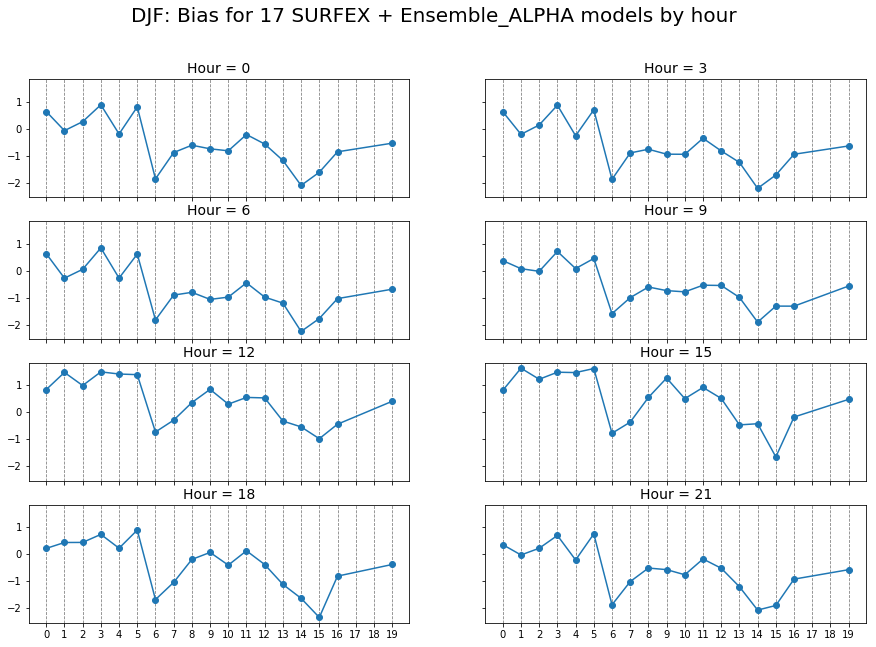

..\plots\output\metrics_ensembles


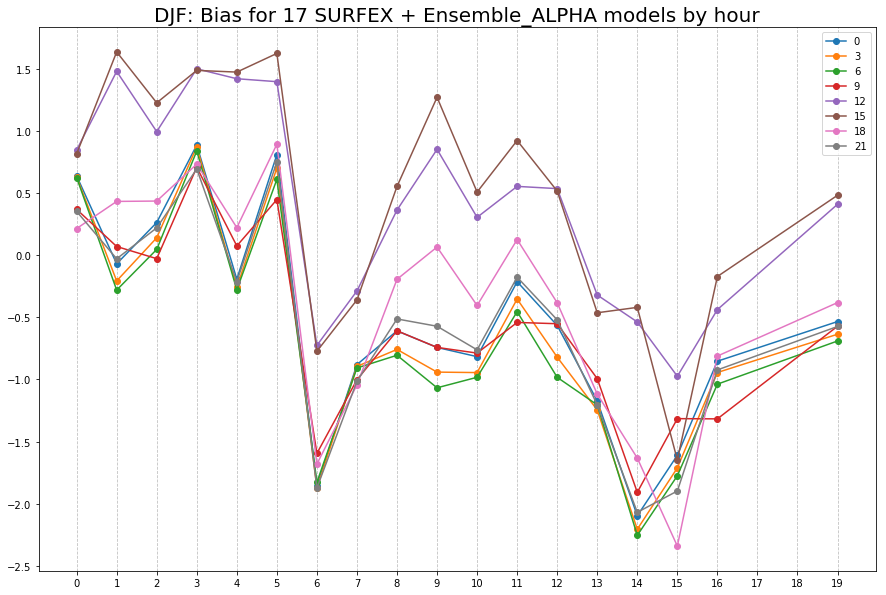

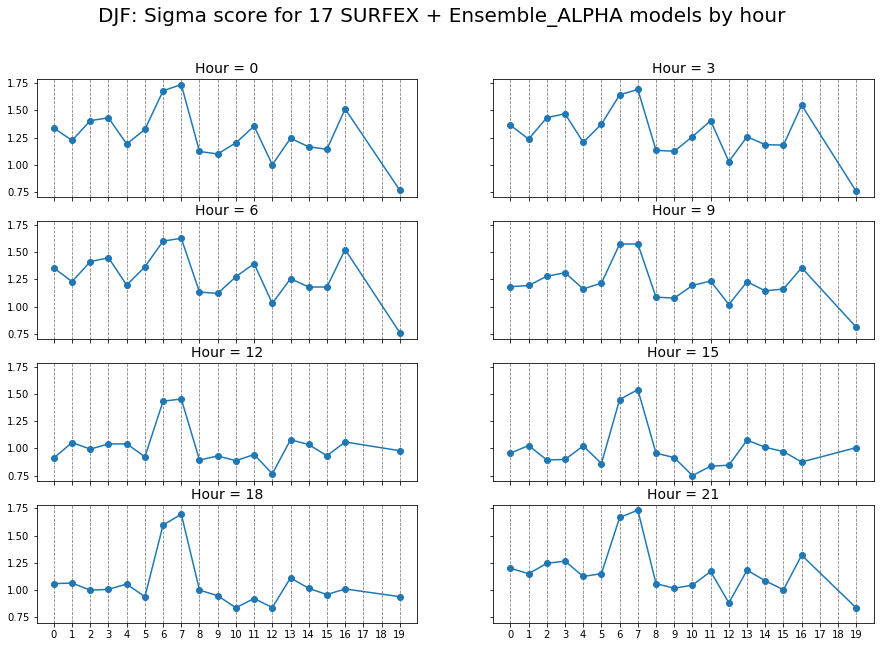

..\plots\output\metrics_ensembles


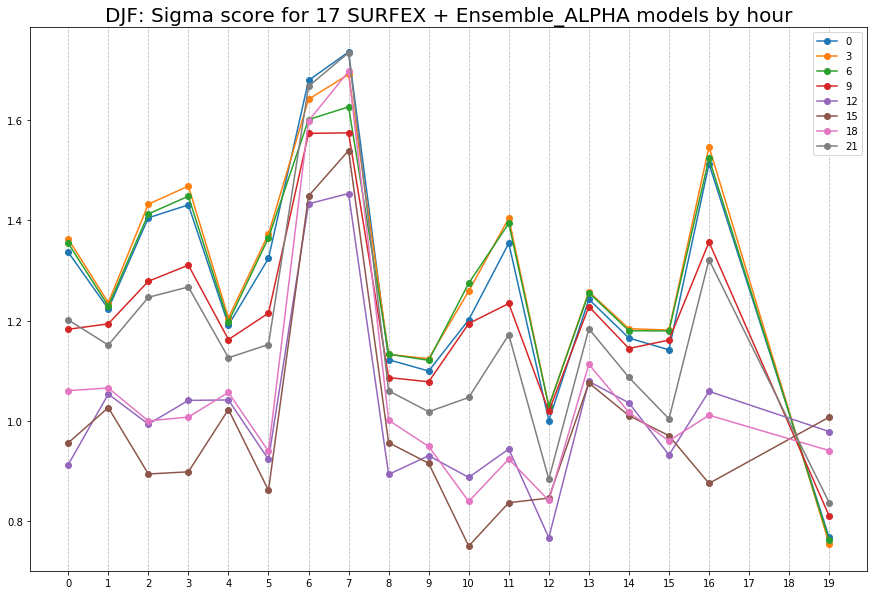

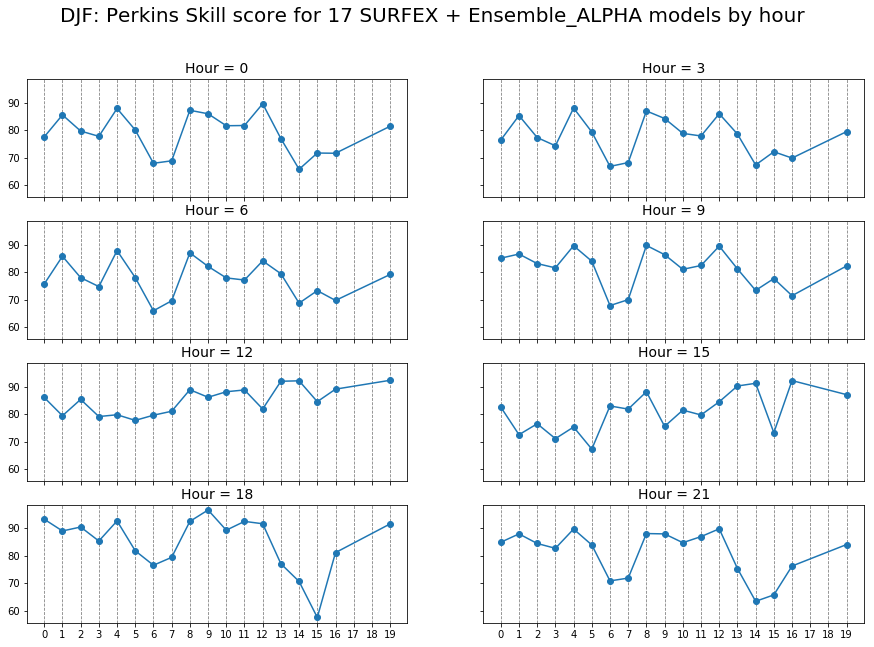

..\plots\output\metrics_ensembles


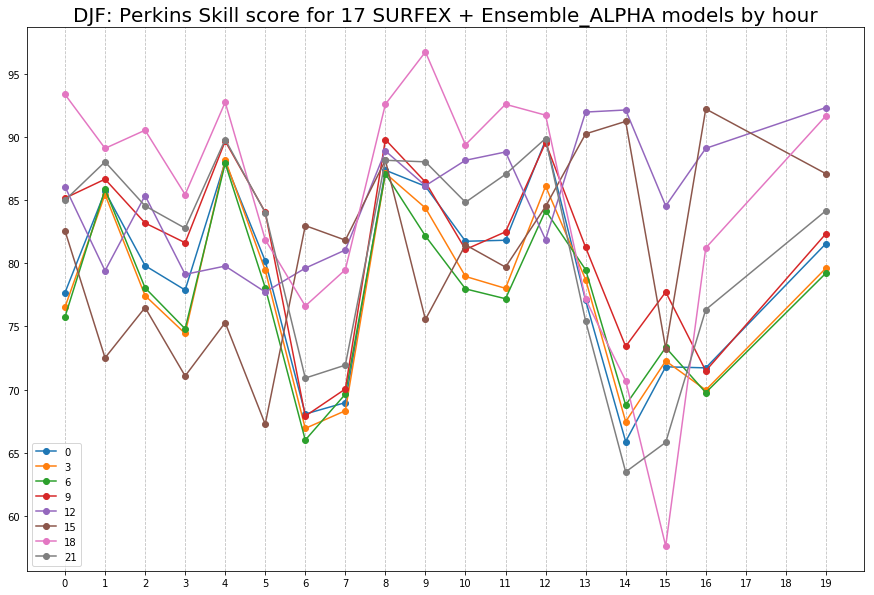

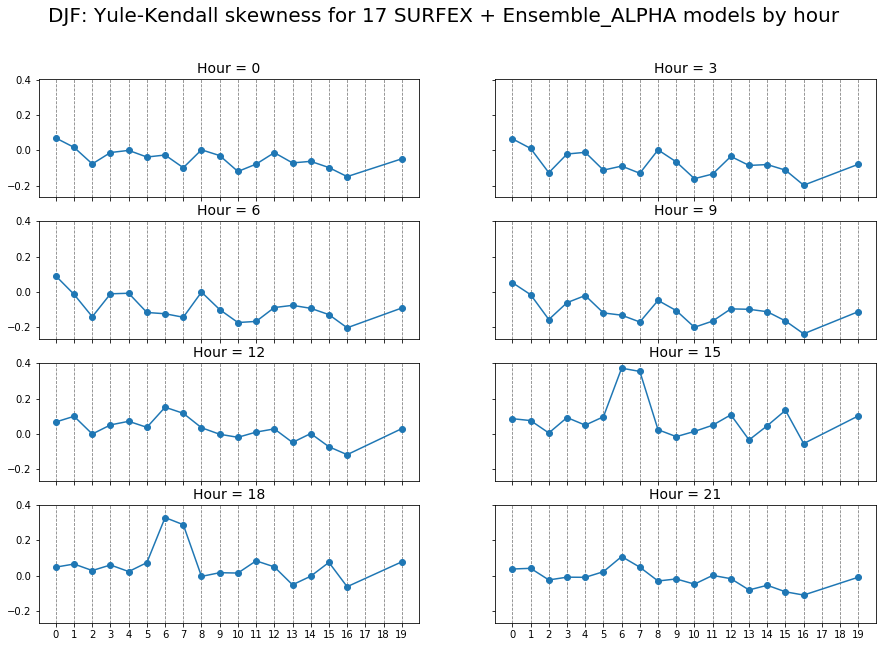

..\plots\output\metrics_ensembles


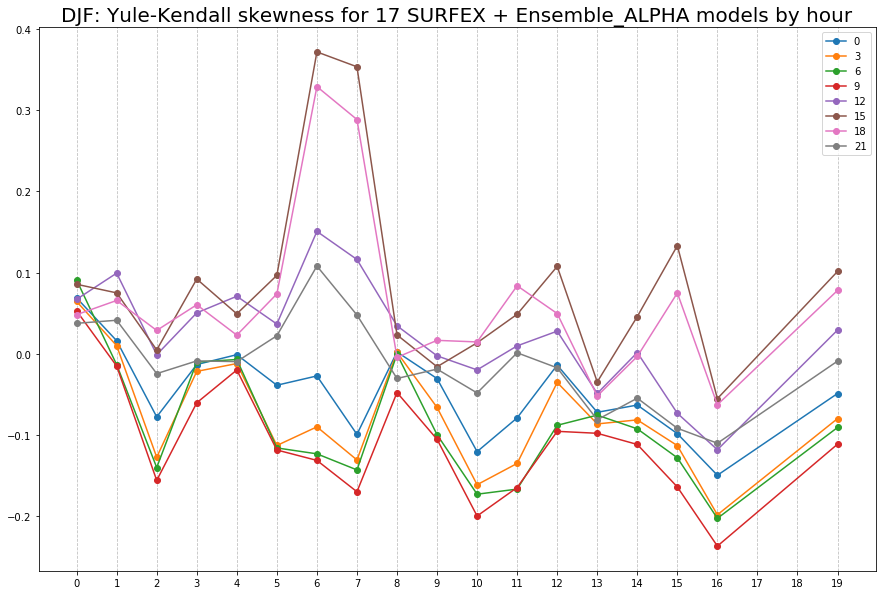

In [18]:
metrics_models_ensemblesALPHA('surfex_join_obs_djf.csv', 'DJF', surfex_output_path, 'SURFEX',
                             models_cols, temp_obs_col, ens_alpha_col,
                             plot=True, sub_folder='metrics_ensembles');

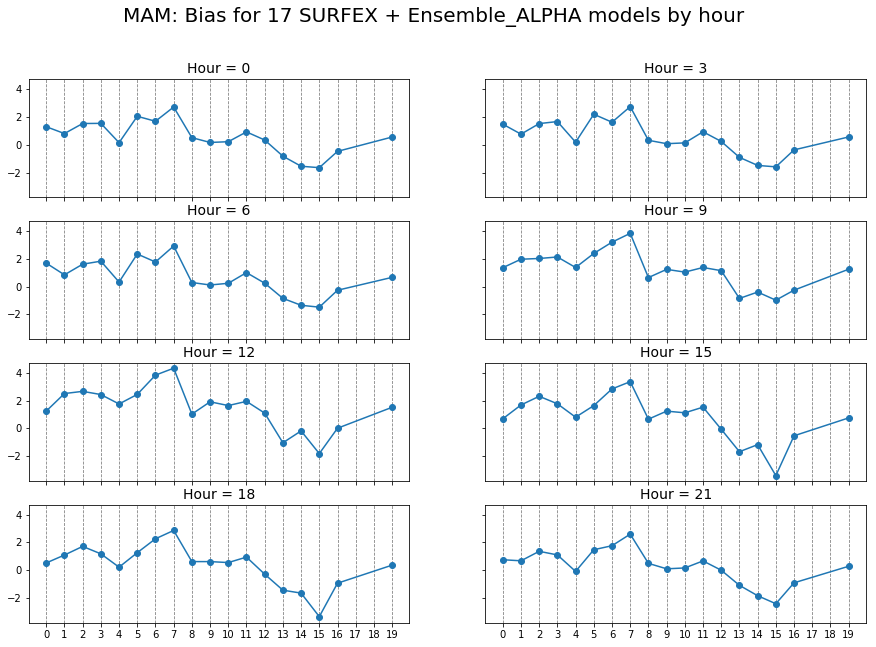

..\plots\output\metrics_ensembles


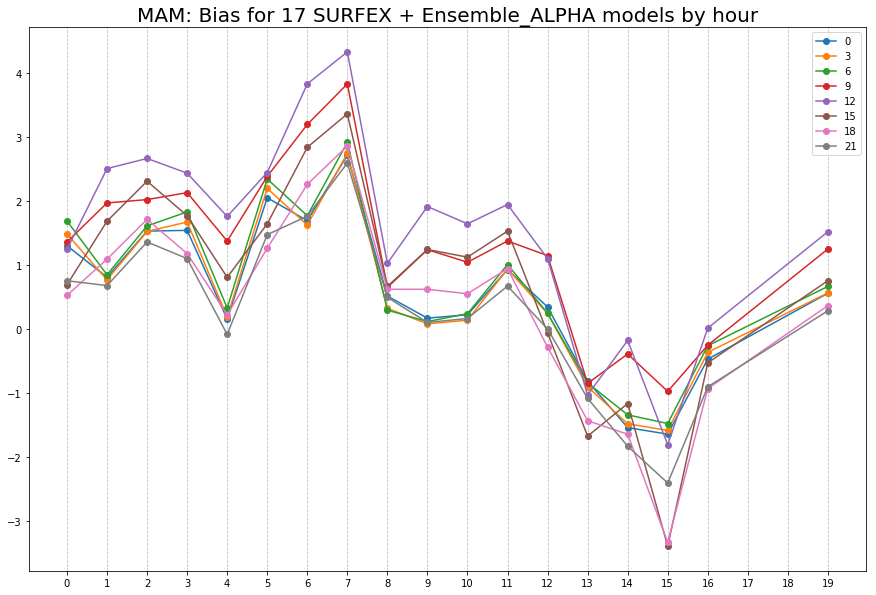

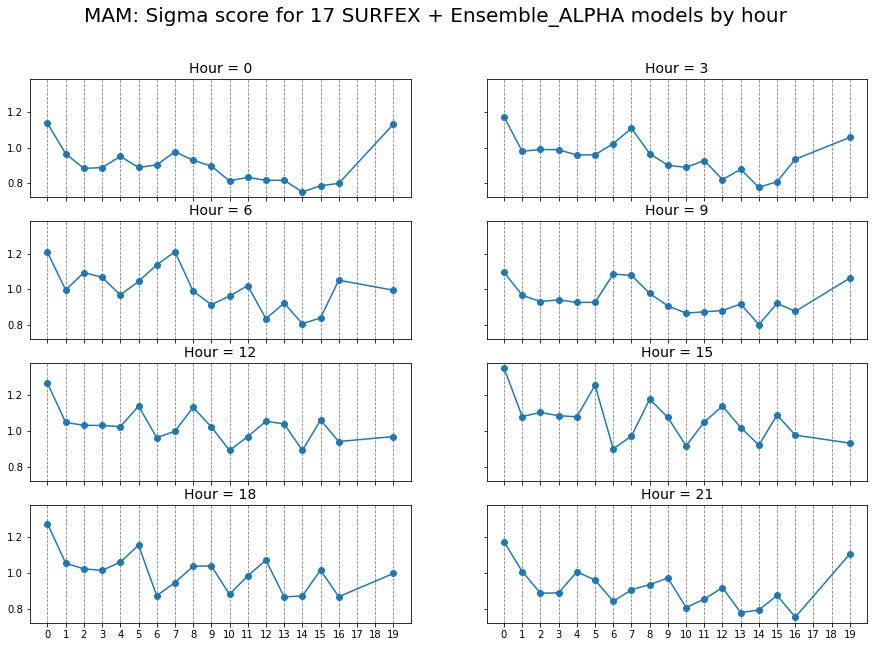

..\plots\output\metrics_ensembles


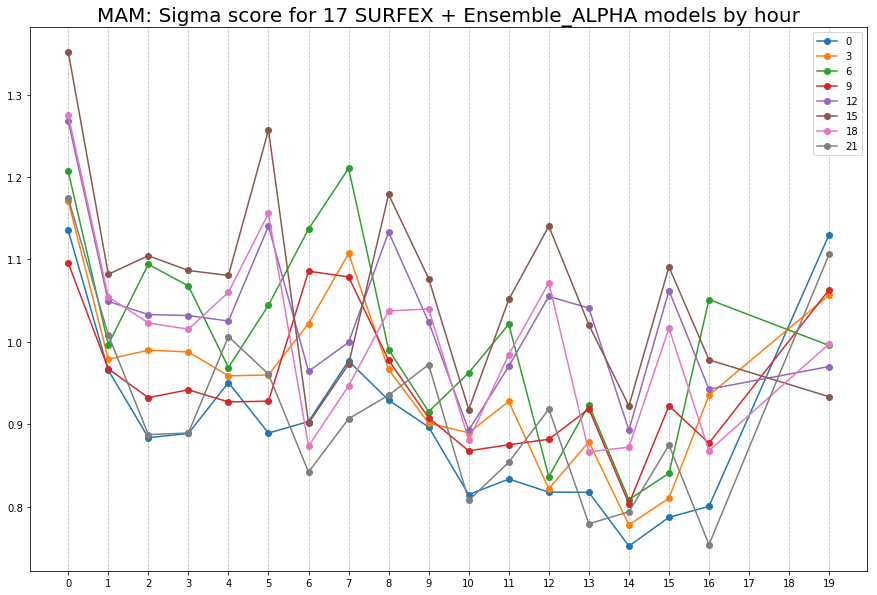

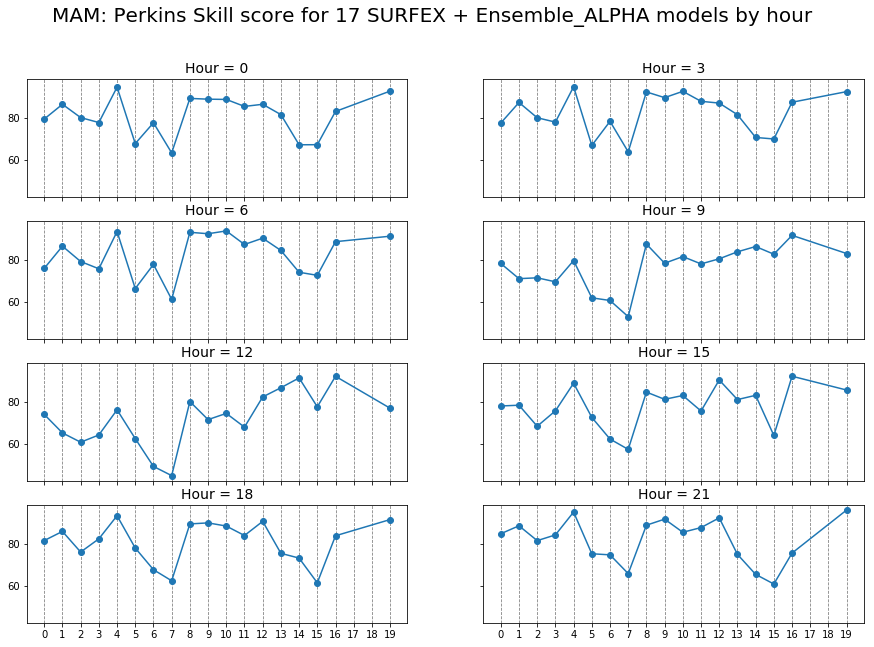

..\plots\output\metrics_ensembles


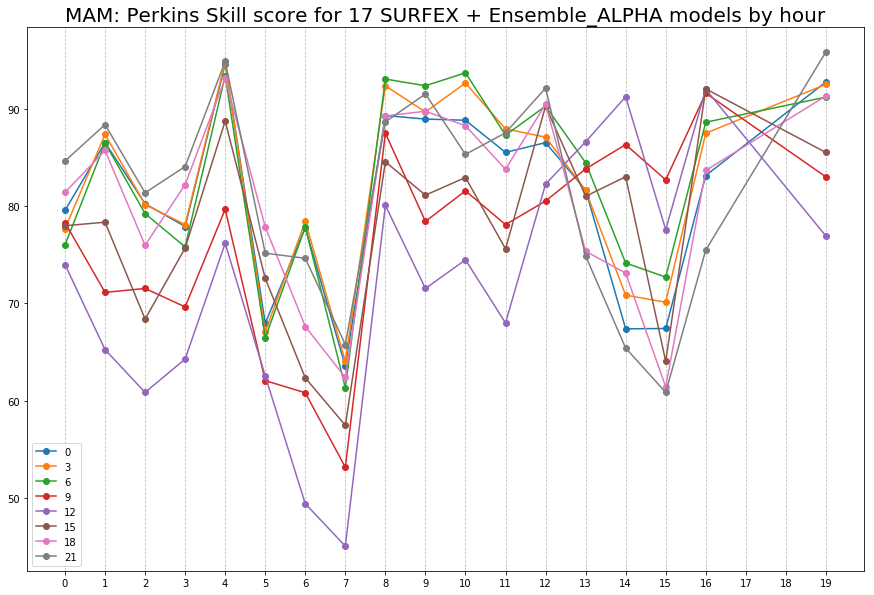

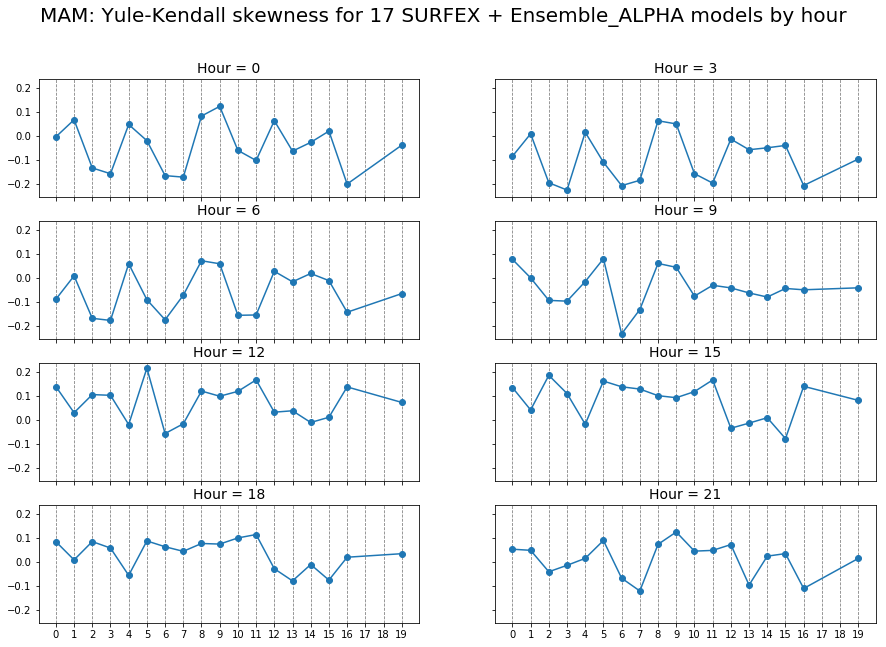

..\plots\output\metrics_ensembles


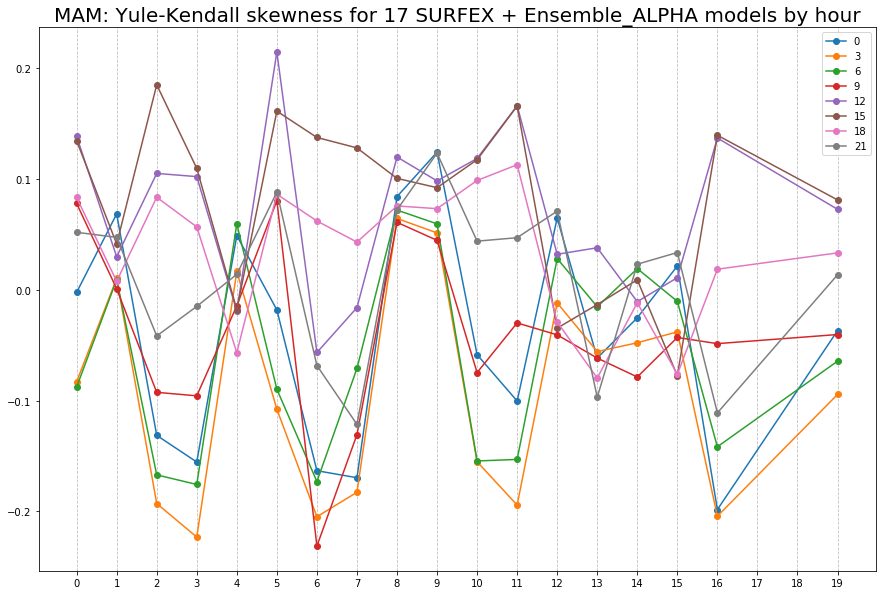

In [19]:
metrics_models_ensemblesALPHA('surfex_join_obs_mam.csv', 'MAM', surfex_output_path, 'SURFEX',
                             models_cols, temp_obs_col, ens_alpha_col,
                             plot=True, sub_folder='metrics_ensembles');

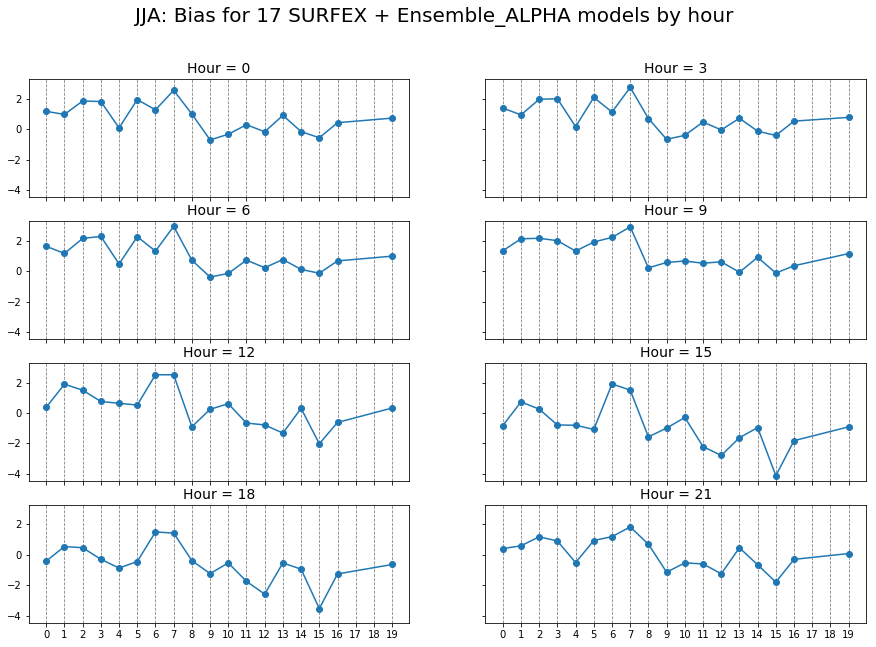

..\plots\output\metrics_ensembles


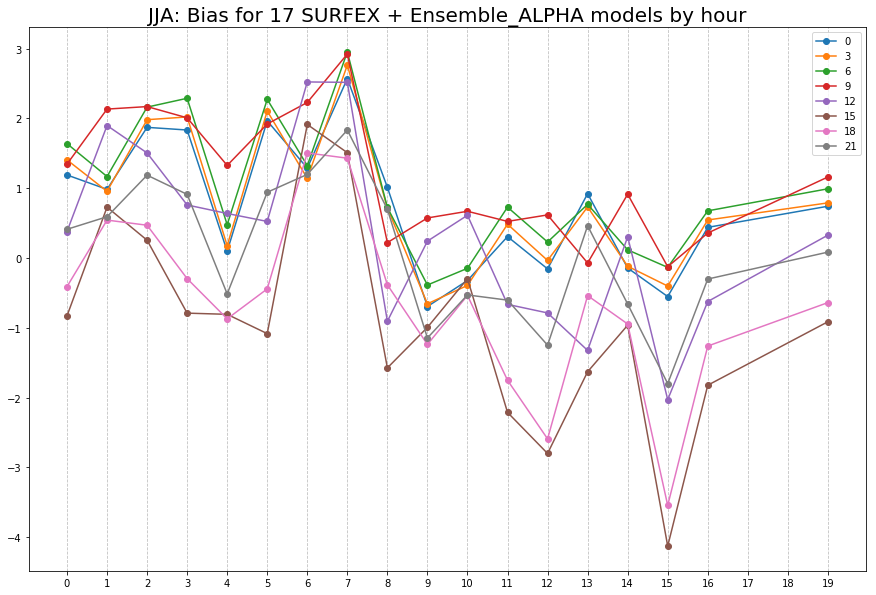

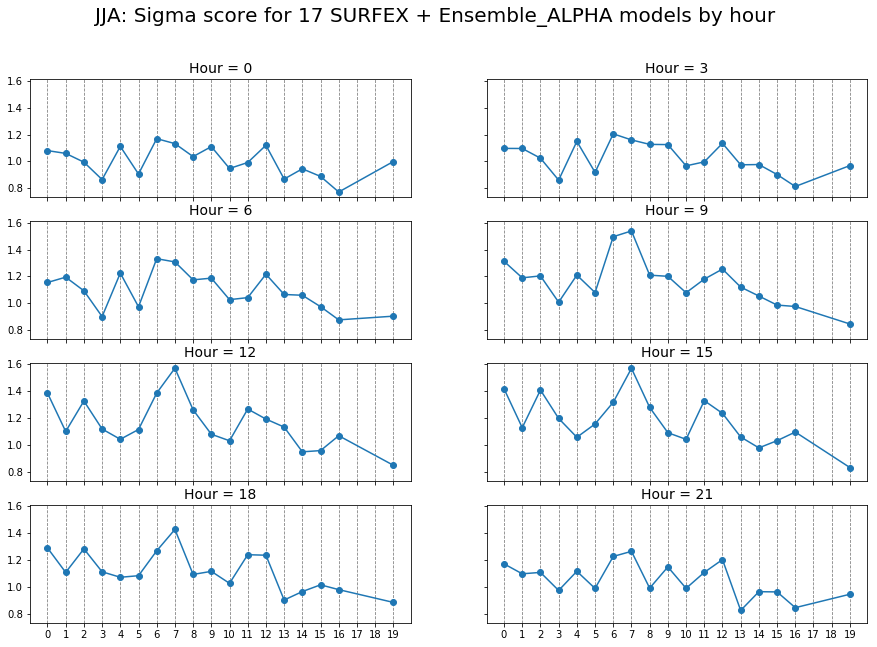

..\plots\output\metrics_ensembles


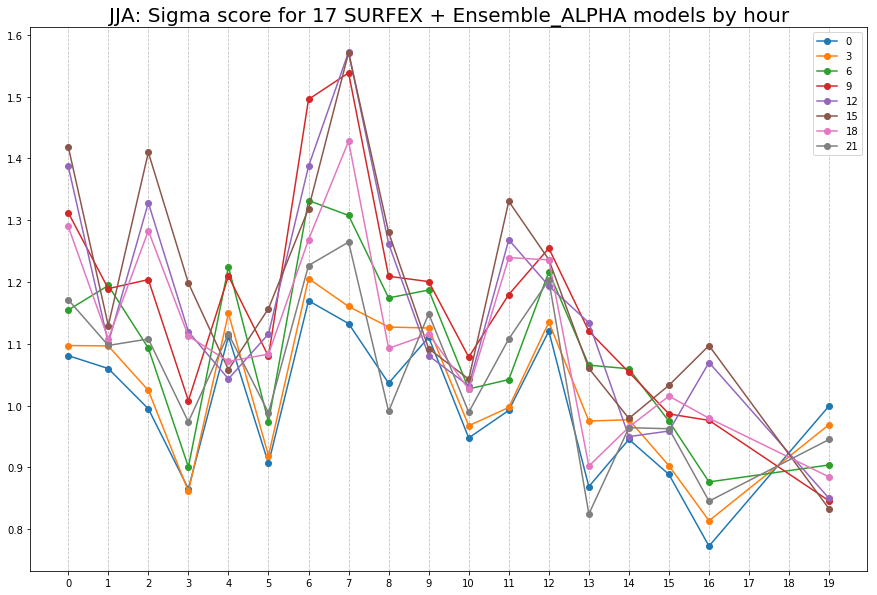

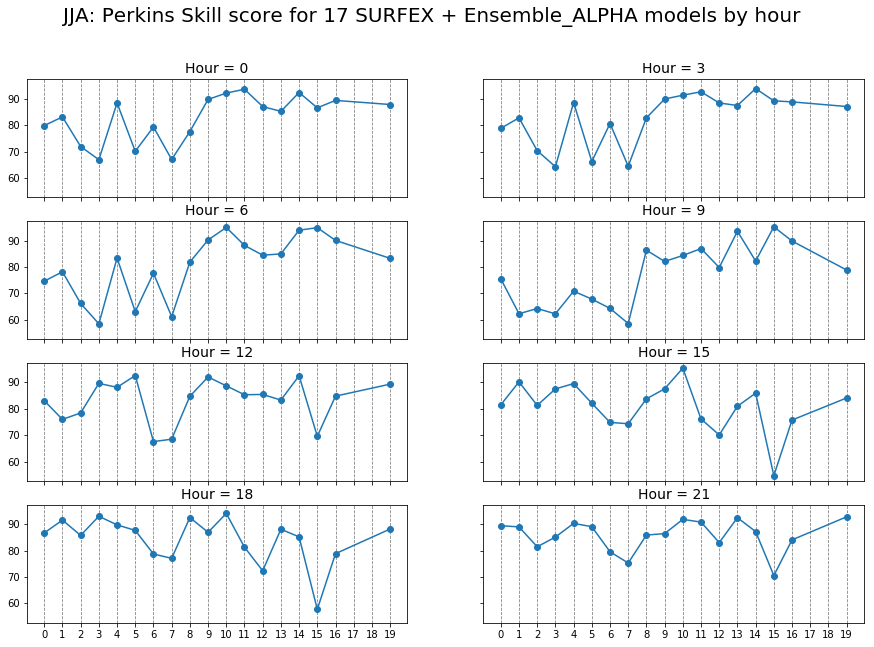

..\plots\output\metrics_ensembles


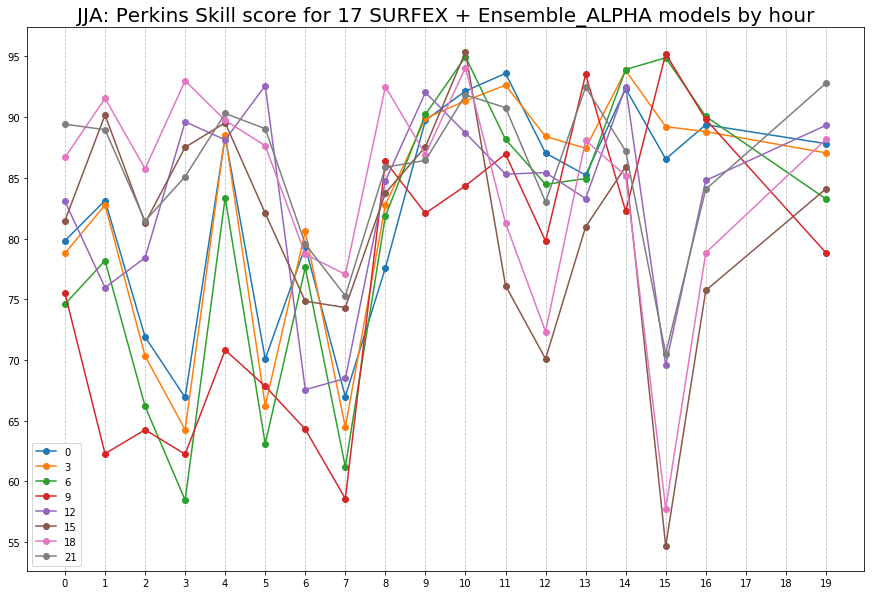

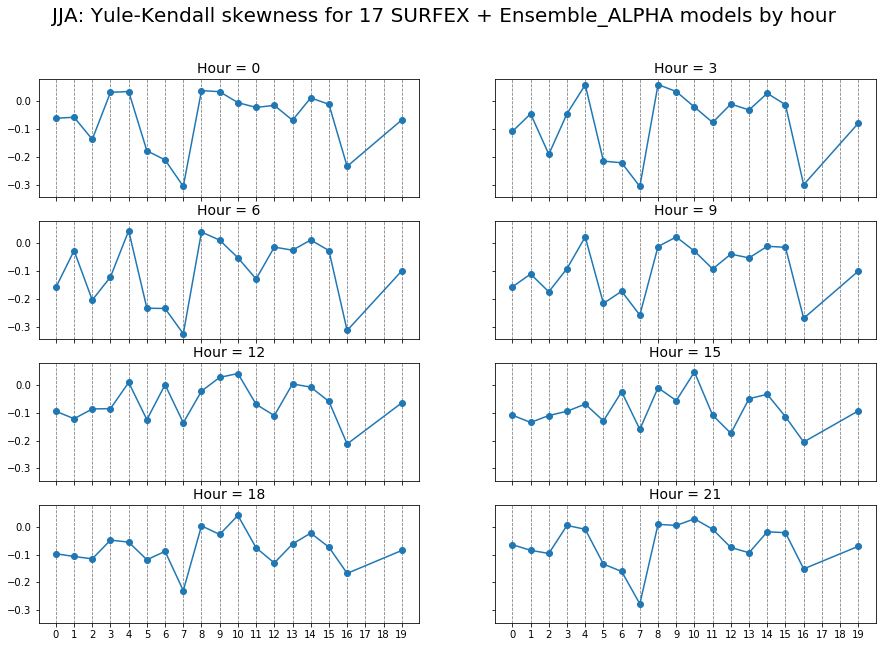

..\plots\output\metrics_ensembles


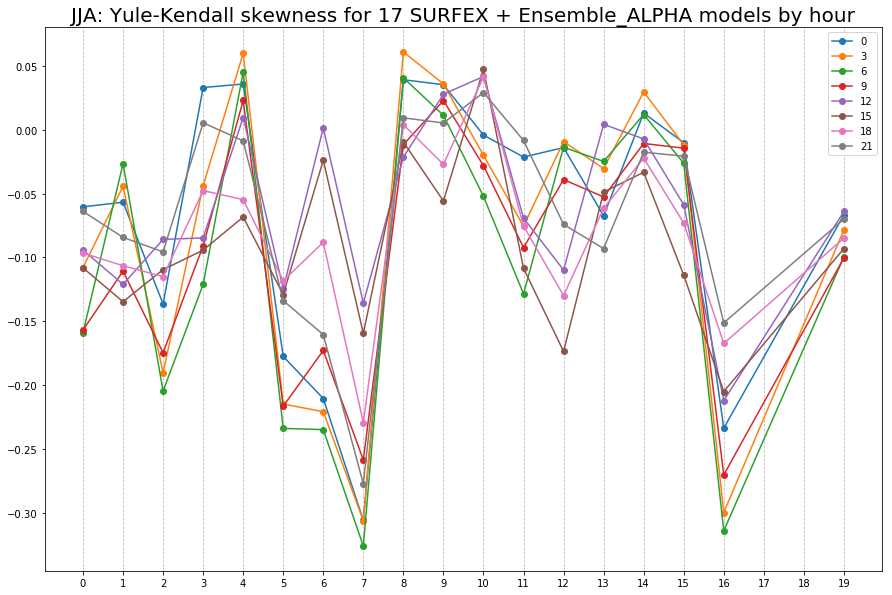

In [20]:
metrics_models_ensemblesALPHA('surfex_join_obs_jja.csv', 'JJA', surfex_output_path, 'SURFEX',
                             models_cols, temp_obs_col, ens_alpha_col,
                             plot=True, sub_folder='metrics_ensembles');

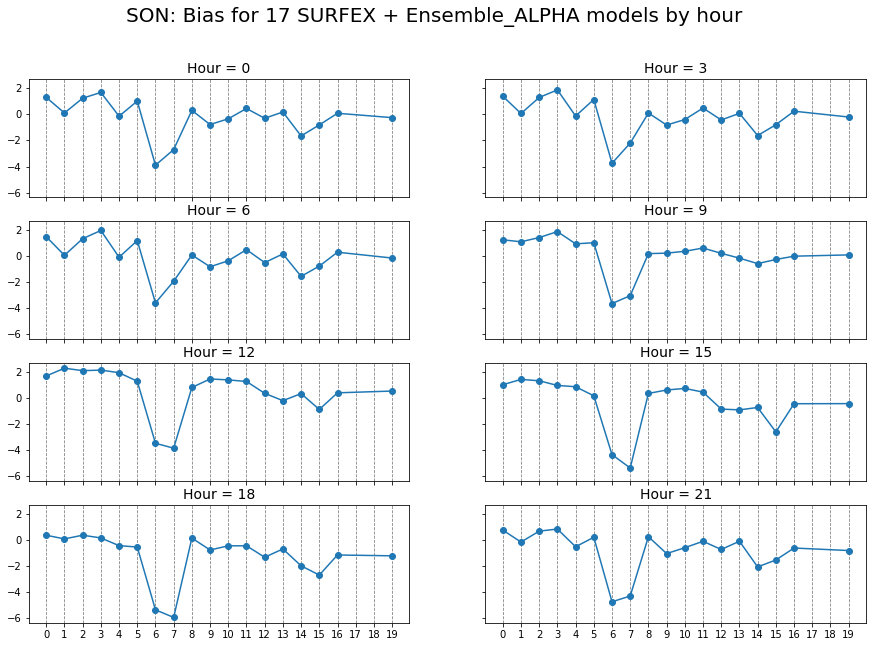

..\plots\output\metrics_ensembles


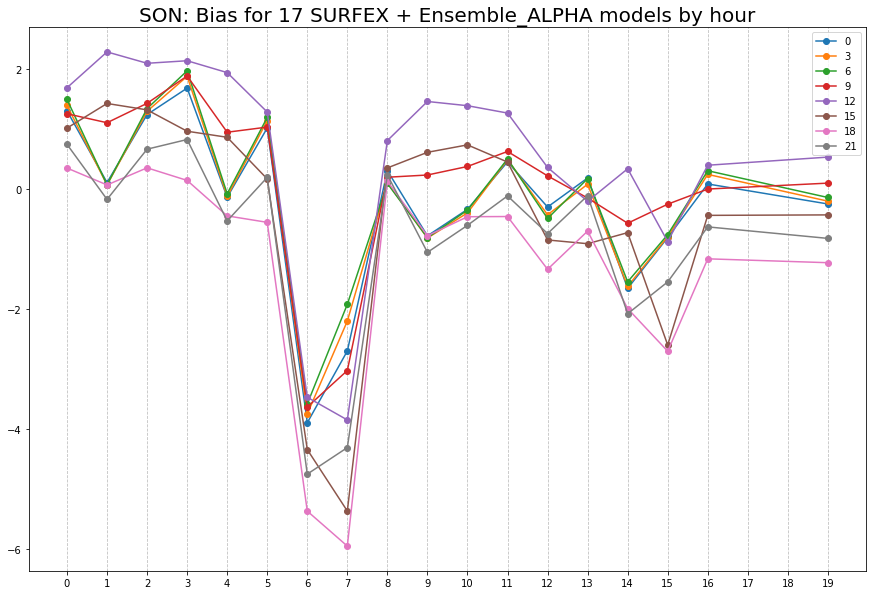

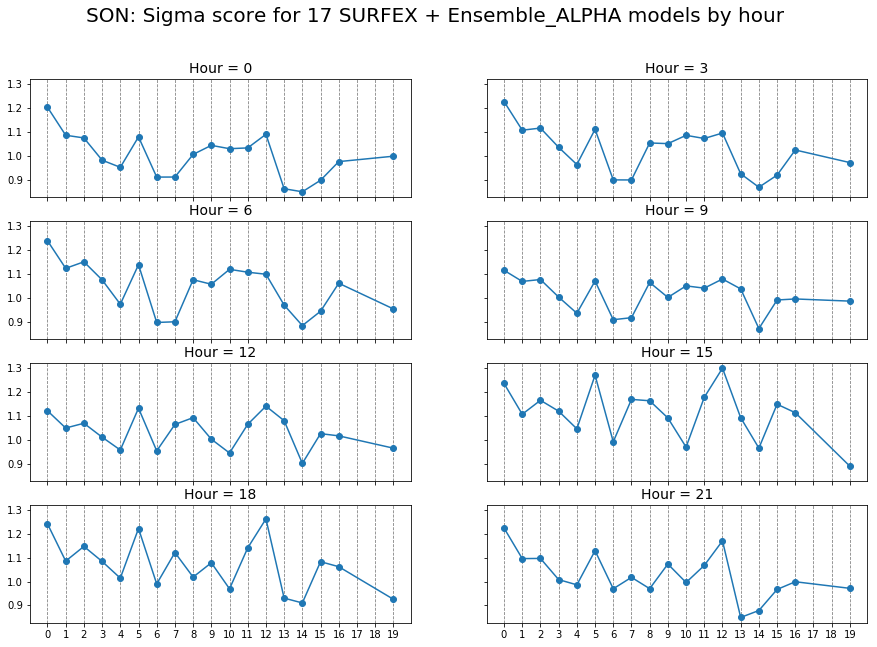

..\plots\output\metrics_ensembles


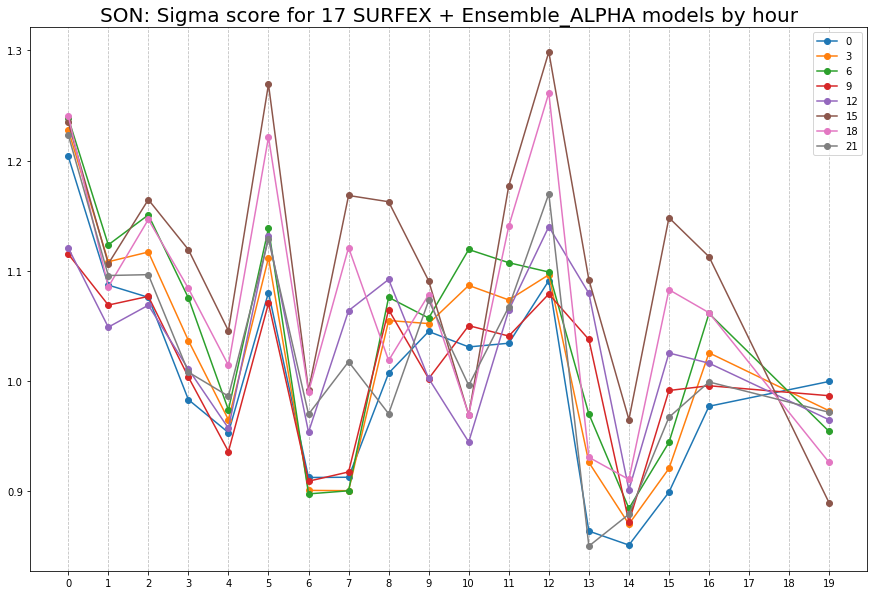

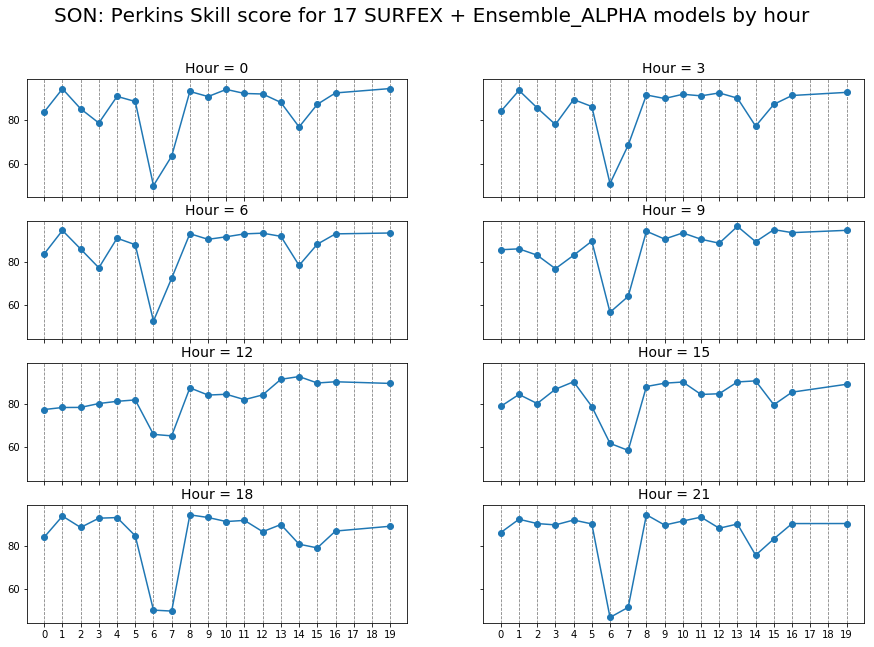

..\plots\output\metrics_ensembles


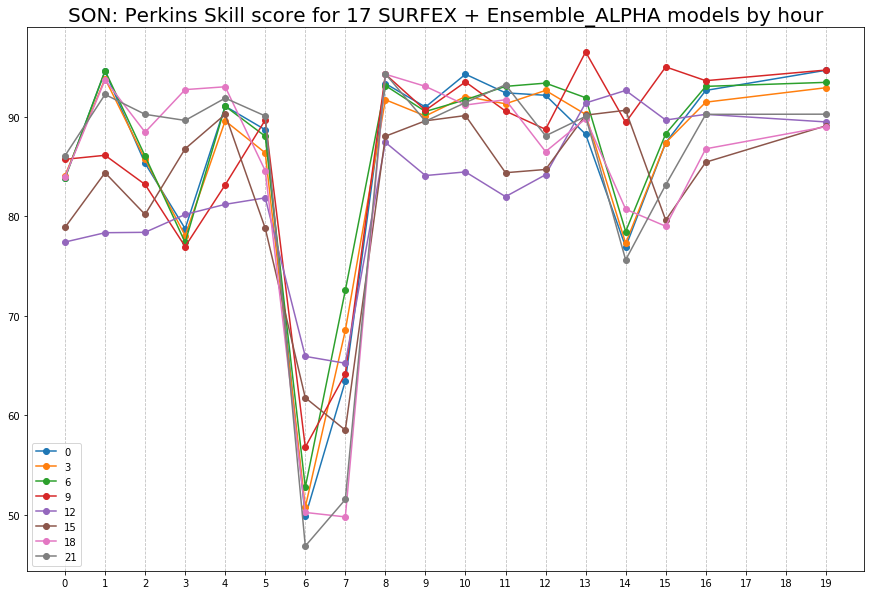

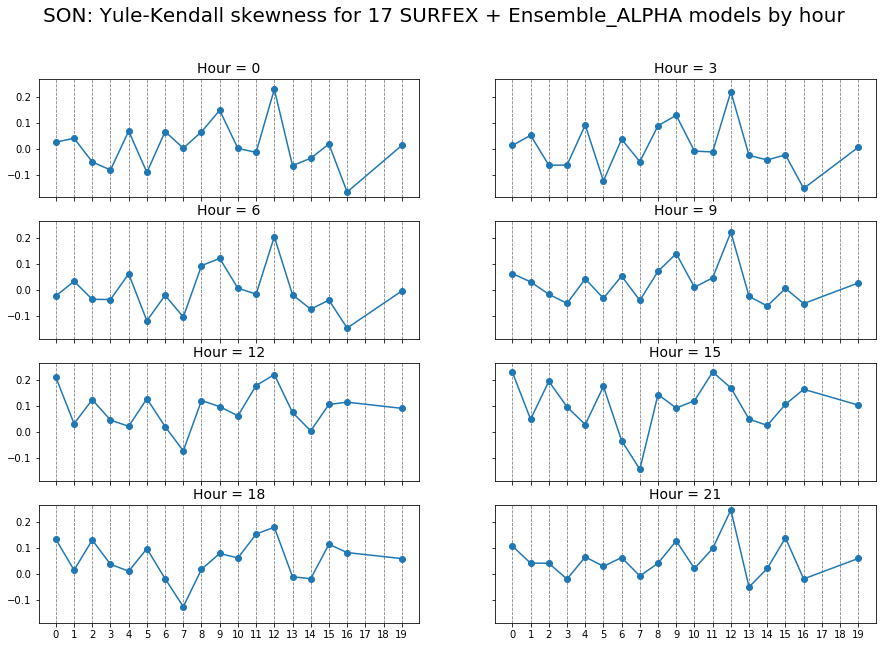

..\plots\output\metrics_ensembles


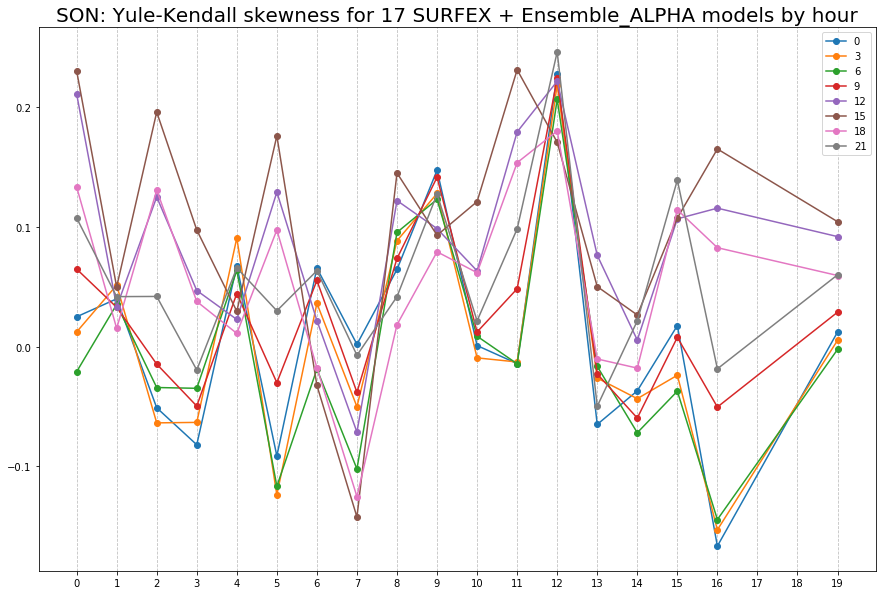

In [21]:
metrics_models_ensemblesALPHA('surfex_join_obs_son.csv', 'SON', surfex_output_path, 'SURFEX',
                             models_cols, temp_obs_col, ens_alpha_col,
                             plot=True, sub_folder='metrics_ensembles');